Suppose you have a shop. Every month you see the total number of your customers. You would like to know which fraction of your customers is "returning" (i.e. they also bought last month) and which fraction is new (did not buy last month) 

In [59]:
import datetime
import pandas as pd
import numpy as np
%matplotlib inline

number_of_periods = 18



Let $x_t$ denote logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u$ and standard deviation $\sigma_u$


In [61]:
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(number_of_periods), periods=number_of_periods, freq='M')
columns = ['number of customers']

mu, sigma = 2, 0.5 # mean and standard deviation
vector_u = np.random.normal(mu, sigma, number_of_periods+1) # number_of_periods+1 makes sure that vector_u[24] is defined
rho = 0.5
x_0 = 25
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    x.append(rho*x[t-1]+vector_u[t])
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

In [64]:
df_customers['number of customers'].mean()

5.470311381583154

On the basis of the mean, you might conclude that you should expect around 0.2 customers on average

In [65]:
df_customers['number of customers'].median()

4.511109664755381

The median seems a bit more pessimistic

In [66]:
df_customers['MA_3'] = df_customers['number of customers'].rolling(window=3).mean()
df_customers['MA_6'] = df_customers['number of customers'].rolling(window=6).mean()

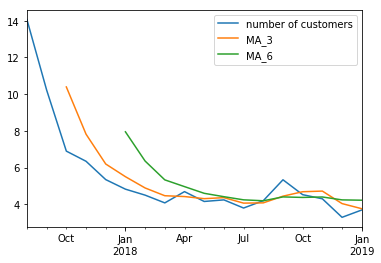

In [67]:
df_customers.plot()

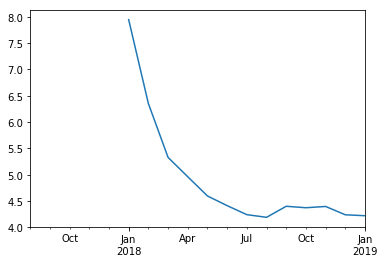

In [68]:
df_customers['MA_6'].plot()